<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/trabajos/NetflixDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Introducción a Google Colab y las librerías más importantes en el machine learning

### Participantes
* Izan Garcia Leñero
* Eduardo Grande Ruiz
* Ahmed Begga

### Bibliografía
* https://colab.research.google.com/notebooks/welcome.ipynb
* https://www.kaggle.com/rounakbanik/the-movies-dataset
* https://www.kaggle.com/rounakbanik/movie-recommender-systems
* https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system
* https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
* https://www.numpy.org/
* https://pandas.pydata.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/
* https://scikit-learn.org/stable/

### Librerías de las que haremos uso durante la práctica

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx # Librería para grafos
import math as math
import time

### Primero empezamos con la carga de los datos que hemos escogido

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
df = pd.read_csv("/content/drive/MyDrive/ITBD practica 3/netflix_titles.csv") #Cargamos el dataset desde el archivo csv que se encuentra en la misma carpeta que el notebook
#df = pd.read_csv("https://raw.githubusercontent.com/andlars/netflix_titles/master/netflix_titles.csv")
df.head(5) #Mostramos las primeras 5 filas del dataset
df[df["type"]=="Movie"].head(5) #Mostramos las primeras 5 filas del dataset que sean películas"]
df[df["type"]=="TV Show"].head(5) #Mostramos las primeras 5 filas del dataset que sean series de TV"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year', 'month', 'day', 'directors', 'categories', 'actors',
       'countries', 'cluster'],
      dtype='object')


### Más información sobre el csv que hemos cargado, usando la librería pandas

In [ ]:
print("Mostramos información del dataset")
print(df.info())
print("Mostramos información estadística del dataset")
print(df.describe())
print("Mostramos la cantidad de valores nulos por columna")
print(df.isnull().sum())
print("Mostramos la cantidad de valores duplicados")
print(df.duplicated().sum())
print("Mostramos los tipos de las columnas")
print(df.dtypes)
print("Mostramos las dimensiones del dataset")
print(df.shape)
print("Información que ha sido omitida")
# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Mostramos información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
Mostramos información estadística del dataset
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max    

### Con la librería pandas, además de sacar estadisticos, podemos realizar operaciones como ordenar, sumar o la media de los datos con la ayuda de numpy

In [ ]:
import datetime
print("Ordenamos el dataset por fecha de lanzamiento")
print(df.sort_values(by="release_year",ascending=False).head())
print("Mostramos la duración media de las películas (minuto): ",datetime.timedelta(minutes=df[df["type"]=="Movie"]["duration"][df["duration"].notnull()].map(lambda x: int(x.split(" ")[0])).mean()))
print("Mostramos la duración media de las series (temporadas): ",df[df["type"]=="TV Show"]["duration"][df["duration"].notnull()].map(lambda x: int(x.split(" ")[0])).mean())
#print("Mostramos el rating medio de las películas: ",df[df["type"]=="Movie"]["rating"][df["rating"].notnull()].value_counts().mean())

Ordenamos el dataset por fecha de lanzamiento
    show_id     type                                  title        director  \
693    s694    Movie                 Ali & Ratu Ratu Queens  Lucky Kuswandi   
781    s782    Movie  Black Holes | The Edge of All We Know   Peter Galison   
762    s763    Movie                           Sweet & Sour   Lee Kae-byeok   
763    s764  TV Show                            Sweet Tooth             NaN   
764    s765    Movie           Trippin' with the Kandasamys   Jayan Moodley   

                                                  cast        country  \
693  Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...            NaN   
781                                                NaN            NaN   
762          Jang Ki-yong, Chae Soo-bin, Jung Soo-jung    South Korea   
763  Nonso Anozie, Christian Convery, Adeel Akhtar,...  United States   
764  Jailoshini Naidoo, Maeshni Naicker, Madhushan ...   South Africa   

    date_added  release_year rating  dur

### Ahora pasaremos a visualizar los datos

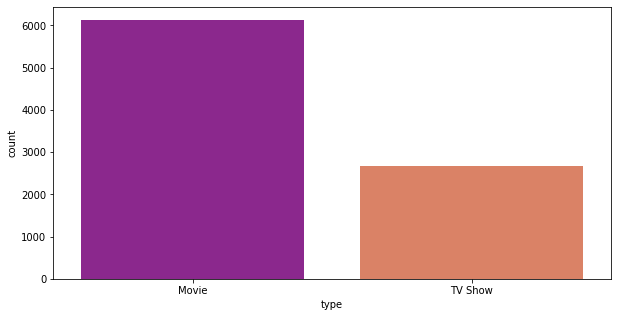

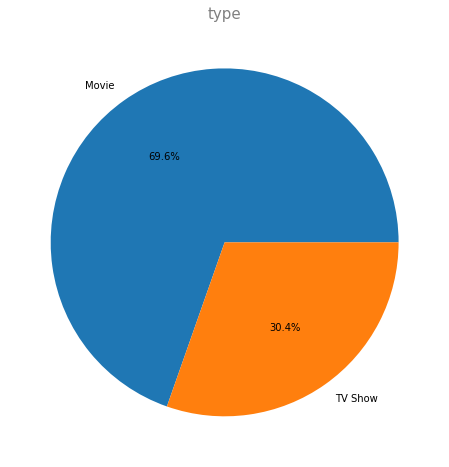

In [ ]:
#Comparación de la cantidad de películas y series
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="type",palette="plasma",ax=ax)
plt.show()
labels = df["type"].value_counts().index
sizes = df["type"].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('type',color = 'grey',fontsize = 15)
plt.show()

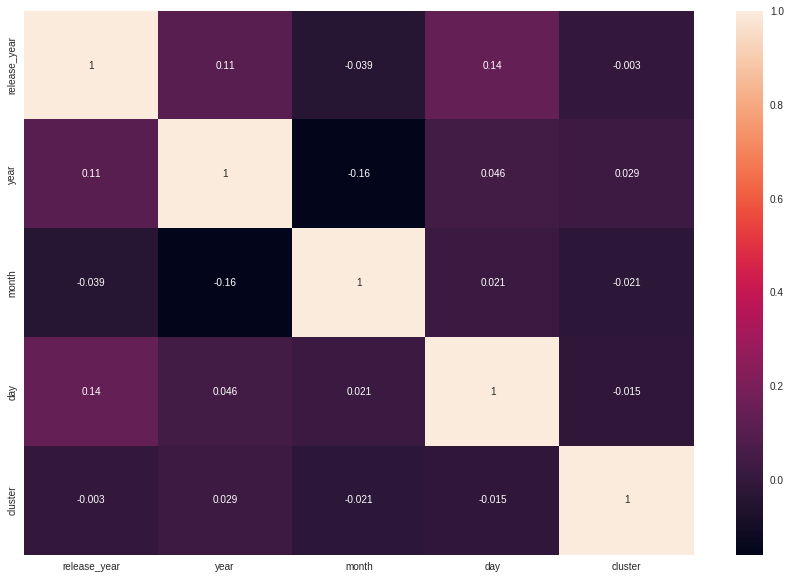

In [ ]:
#Visualización de las correlaciones entre las variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

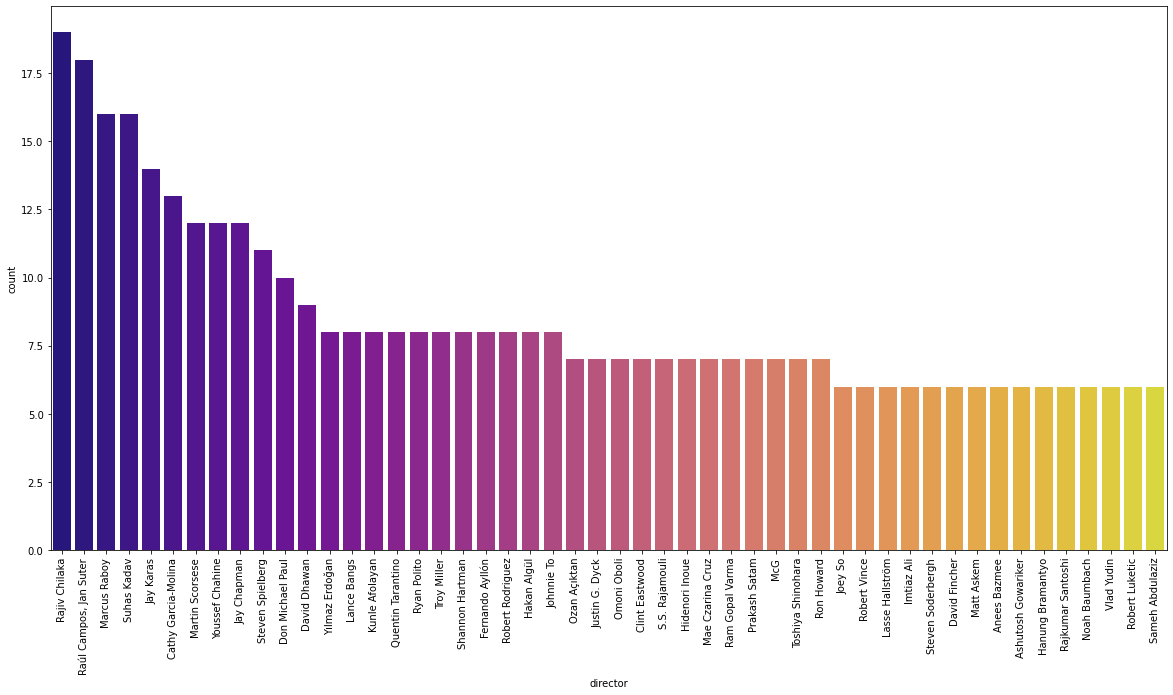

In [ ]:
#Visualización de los directores con más películas en Netflix
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['director'] ,palette='plasma',order=df['director'].value_counts().index[0:50])
plt.show()

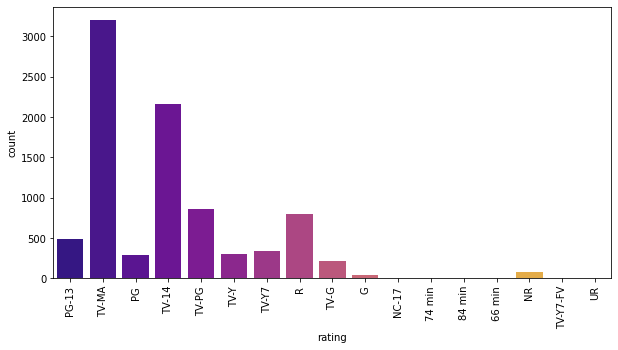

In [ ]:
#Visualización del rating de las películas
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="rating",palette="plasma",ax=ax)
plt.xticks(rotation=90)
plt.show()

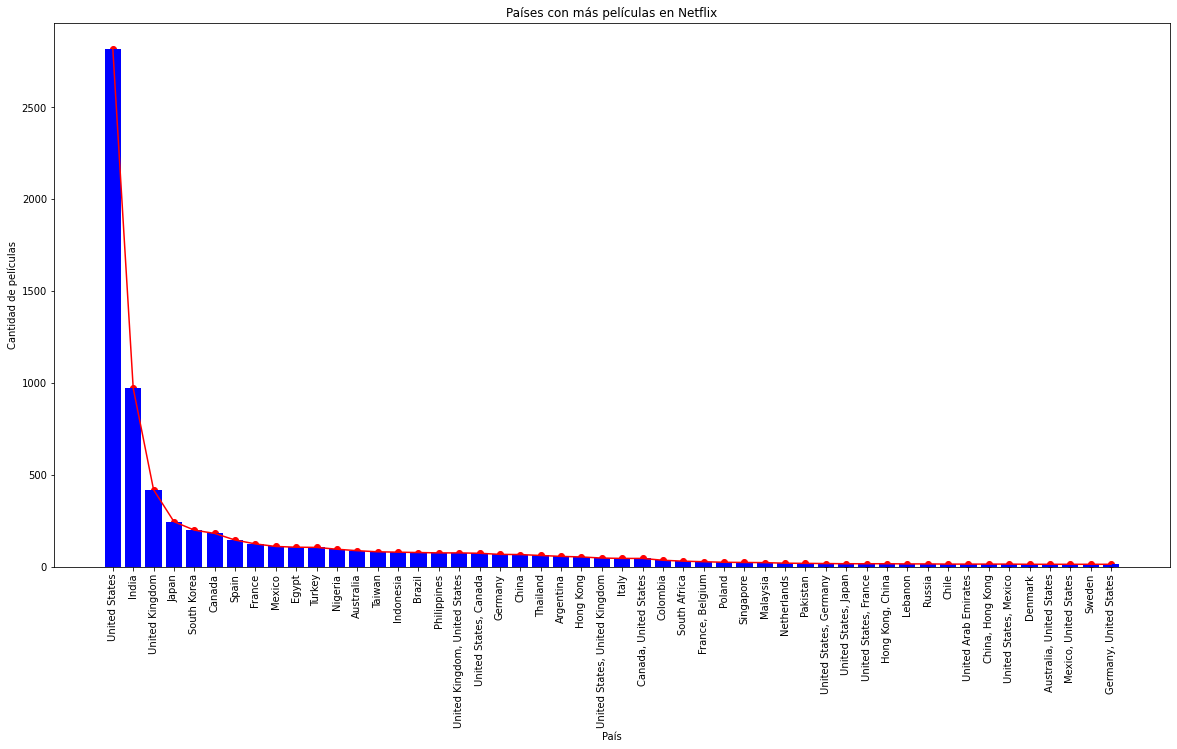

In [ ]:
#Visualización de los países con más películas en Netflix
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
plt.title('Países con más películas en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad de películas')
plt.bar(df['country'].value_counts().index[0:50],df['country'].value_counts()[0:50],color='blue')
plt.scatter(df['country'].value_counts().index[0:50],df['country'].value_counts()[0:50],color='red')
plt.plot(df['country'].value_counts().index[0:50],df['country'].value_counts()[0:50],color='red')
plt.show()

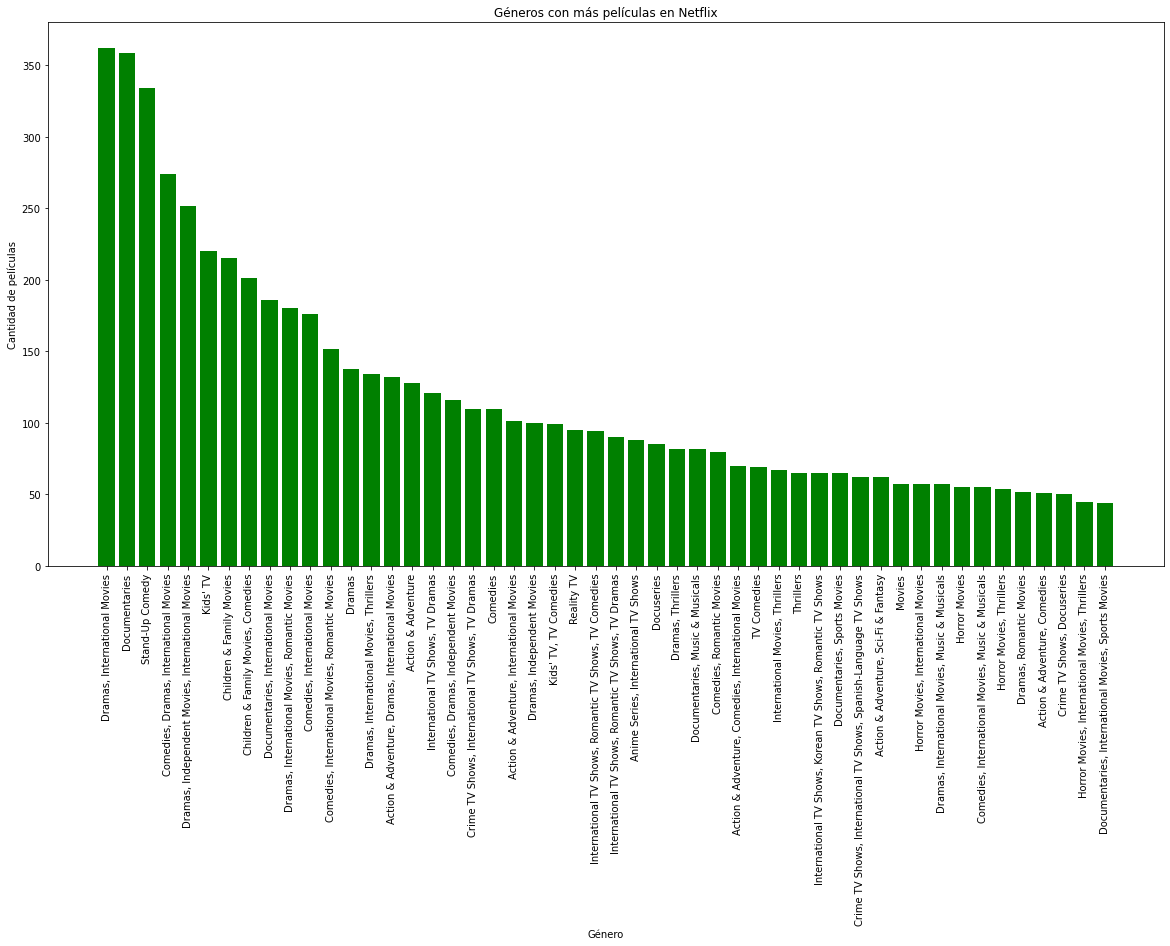

In [ ]:
#Visualización de los géneros con más películas en Netflix
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
plt.title('Géneros con más películas en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.bar(df['listed_in'].value_counts().index[0:50],df['listed_in'].value_counts()[0:50],color='green')
plt.show()


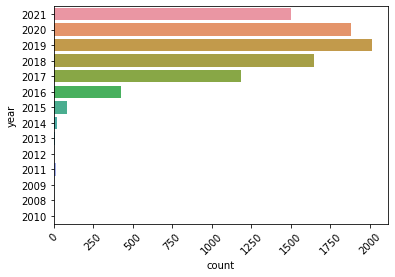

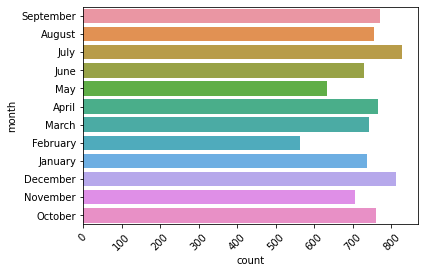

In [ ]:
#Visualización del contenido agregado por año y que meses son los que más contenido agregan
date = df[["date_added"]].dropna()
date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
date['month'] = date["date_added"].apply(lambda i: i.lstrip().split(' ')[0])
plt.xticks(rotation=45)
sns.countplot(y=date['year'])
plt.show()
plt.xticks(rotation=45)
sns.countplot(y=date['month'])
plt.show()

### Una vez vistos los datos, vamos a pasar a realizar una serie de operaciones con ellos, para finalmente, construir un sistema de recomendación de netflix

In [ ]:
#Conversión al formato de fecha de Python
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

df["date_added"] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
# Cambiamos las columnas de "director, listed_in, cast y country" en columnas que contengan una lista real con sus elementos "troceados"
# En el caso de que el campo este vacio(NaN), entonces agrearemos una lista vacia[]
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
print("El nuevo dataframe limpio es:")
df.head()

El nuevo dataframe limpio es:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries,cluster
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,[Kirsten Johnson],[Documentaries],[],[United States],94
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,[],"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],60
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,[Julien Leclercq],"[Crime TV Shows, International TV Shows, TV Ac...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],94
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,[],"[Docuseries, Reality TV]",[],[],196
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,[],"[International TV Shows, Romantic TV Shows, TV...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],38


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

# print the centers of the clusters
# for i in range(0,k):
#     word_list=[]
#     print("cluster%d:"% i)
#     for j in centers[i,:10]:
#         word_list.append(terms[j])
#     print(word_list)

request_transform = vector.transform(df['description'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform)

df['cluster'].value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


43     4634
116    1166
83      996
92      595
76      280
       ... 
144       1
199       1
86        1
51        1
84        1
Name: cluster, Length: 199, dtype: int64

In [ ]:
# Find similar : get the top_n movies with description similar to the target description
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [ ]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
#    G.add_node(rowi['cluster'],label="CLUSTER")
#    G.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")

    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.04749345779418945 seconds --
 iter 1000 -- 5.667903900146484 seconds --
 iter 2000 -- 11.26982069015503 seconds --
 iter 3000 -- 16.741636991500854 seconds --
 iter 4000 -- 22.609791040420532 seconds --
 iter 5000 -- 28.465199947357178 seconds --
 iter 6000 -- 34.516518354415894 seconds --
 iter 7000 -- 40.11398482322693 seconds --
 iter 8000 -- 46.0174241065979 seconds --
 finish -- 50.9381103515625 seconds --


In [ ]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

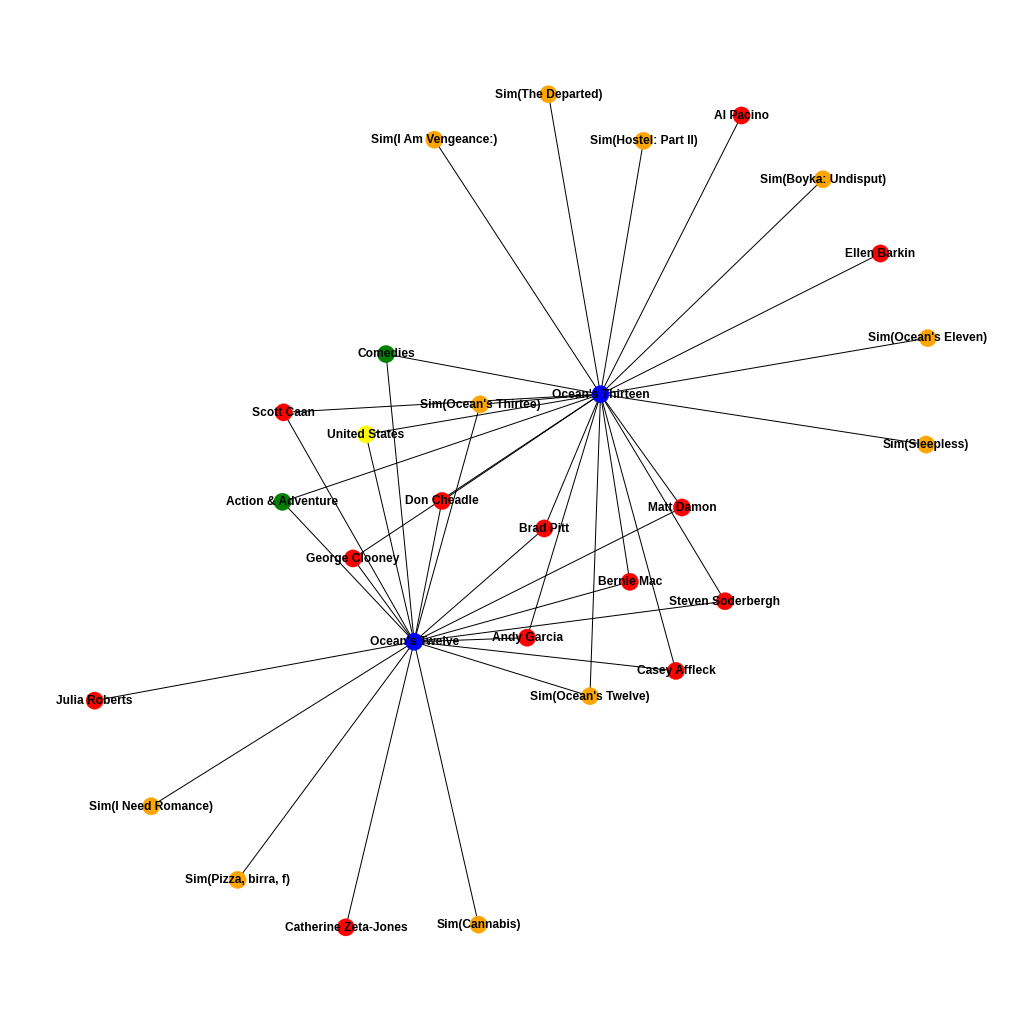

In [ ]:
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [ ]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)
    return result;


In [ ]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
result5 = get_recommendation("The Irishman")
result6 = get_recommendation("DreamWorks Shrek's Swamp Stories")
result7 = get_recommendation("The Umbrella Academy")
result8 = get_recommendation("The Crown")
result9 = get_recommendation("Manifest")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())
print("*"*40+"\n Recommendation for 'The Irishman'\n"+"*"*40)
print(result5.head())
print("*"*40+"\n Recommendation for 'DreamWorks Shrek's Swamp Stories'\n"+"*"*40)
print(result6.head())
print("*"*40+"\n Recommendation for 'The Umbrella Academy'\n"+"*"*40)
print(result7.head())
print("*"*40+"\n Recommendation for 'The Crown'\n"+"*"*40)
print(result8.head())
print("*"*40+"\n Recommendation for 'Manifest'\n"+"*"*40)
print(result9.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen    6.210907
Ocean's Eleven      1.520712
Sleepless           1.385995
The Informant!      1.231612
Babel               1.160762
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       6.210907
The Departed         2.213117
Ocean's Eleven       2.078823
Hostel: Part III     1.796084
Brooklyn's Finest    1.449024
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Boy                                  1.891867
Lying and Stealing                       1.721734
The Devil and Father Amorth              1.408107
Making a Murderer                        1.237974
Belief: The Possession of Janet Moses    1.116221
dtype: float64
****************************************
 Recommendation 

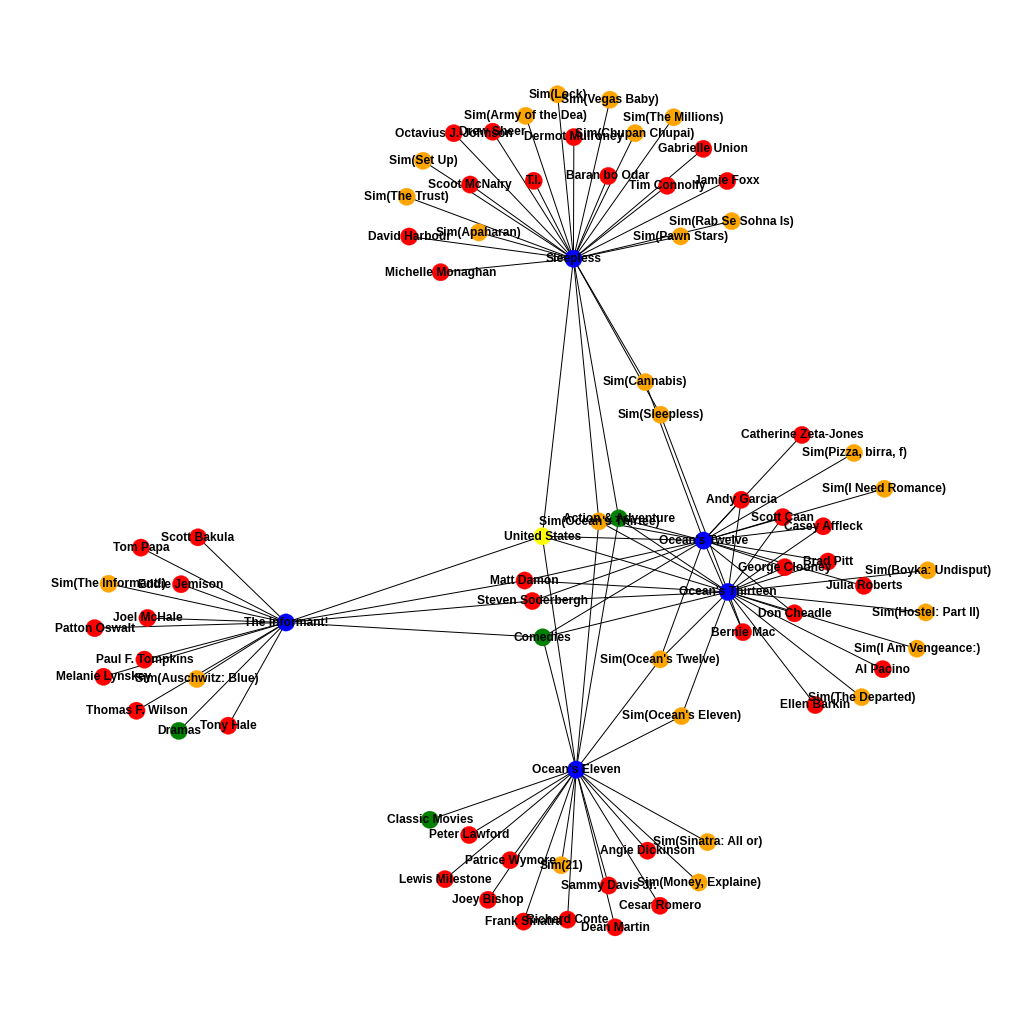

In [ ]:
reco=list(result.index[:4].values)
reco.extend(["Ocean's Twelve"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

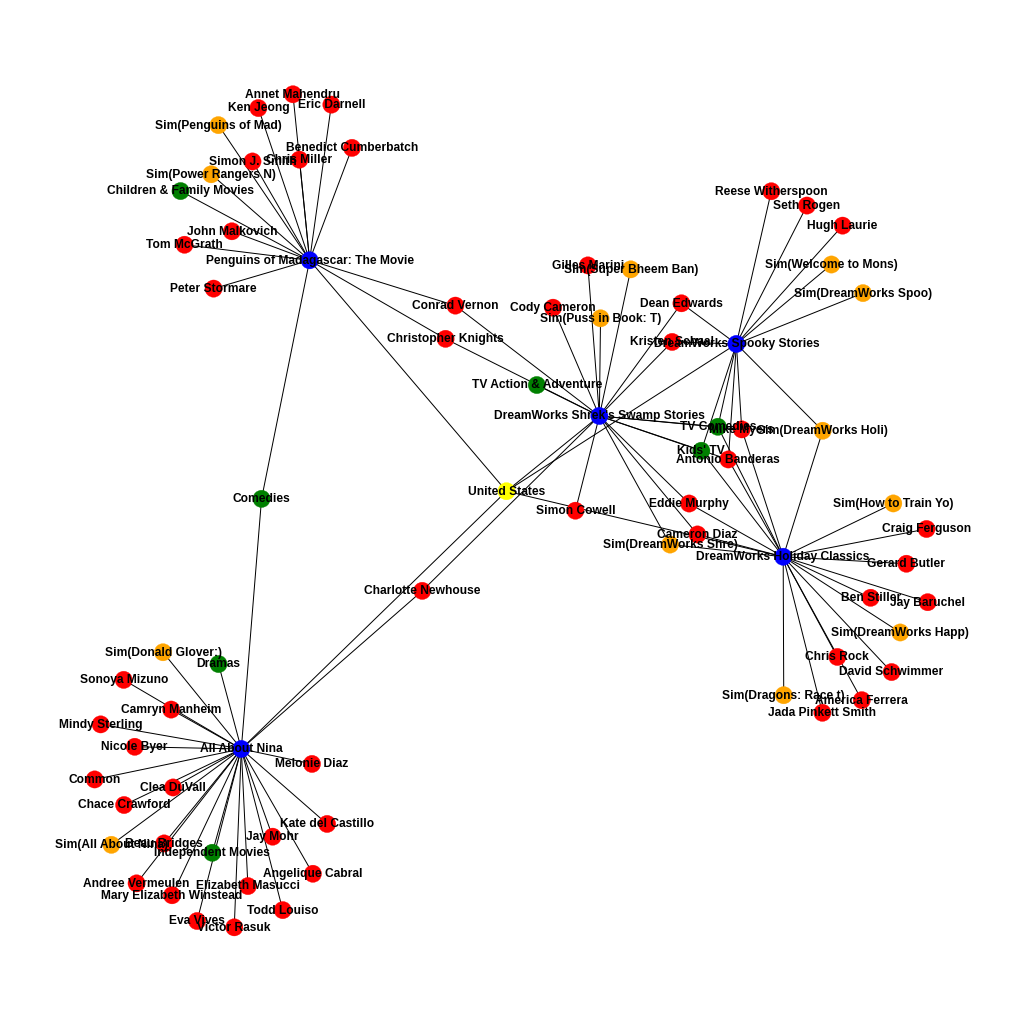

In [ ]:
reco=list(result6.index[:4].values)
reco.extend(["DreamWorks Shrek's Swamp Stories"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

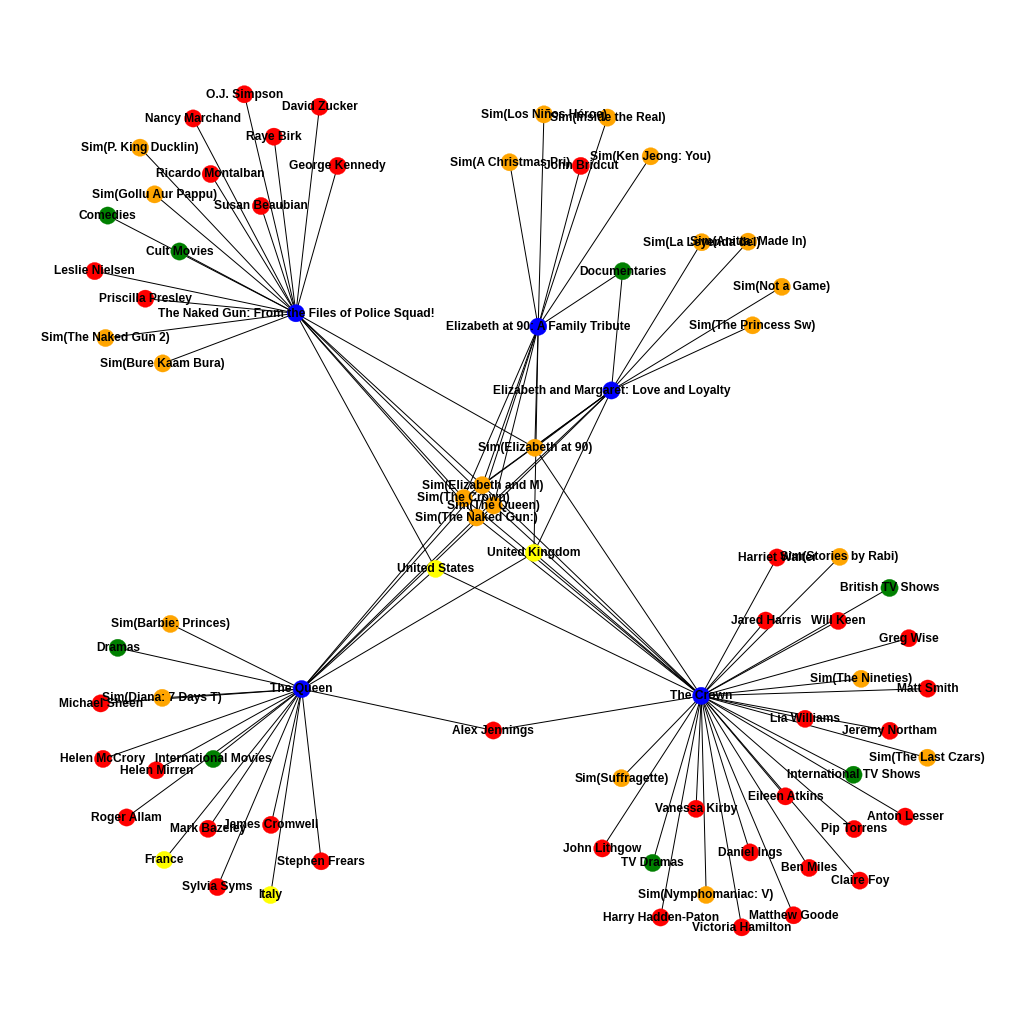

In [ ]:
reco=list(result8.index[:4].values)
reco.extend(["The Crown"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

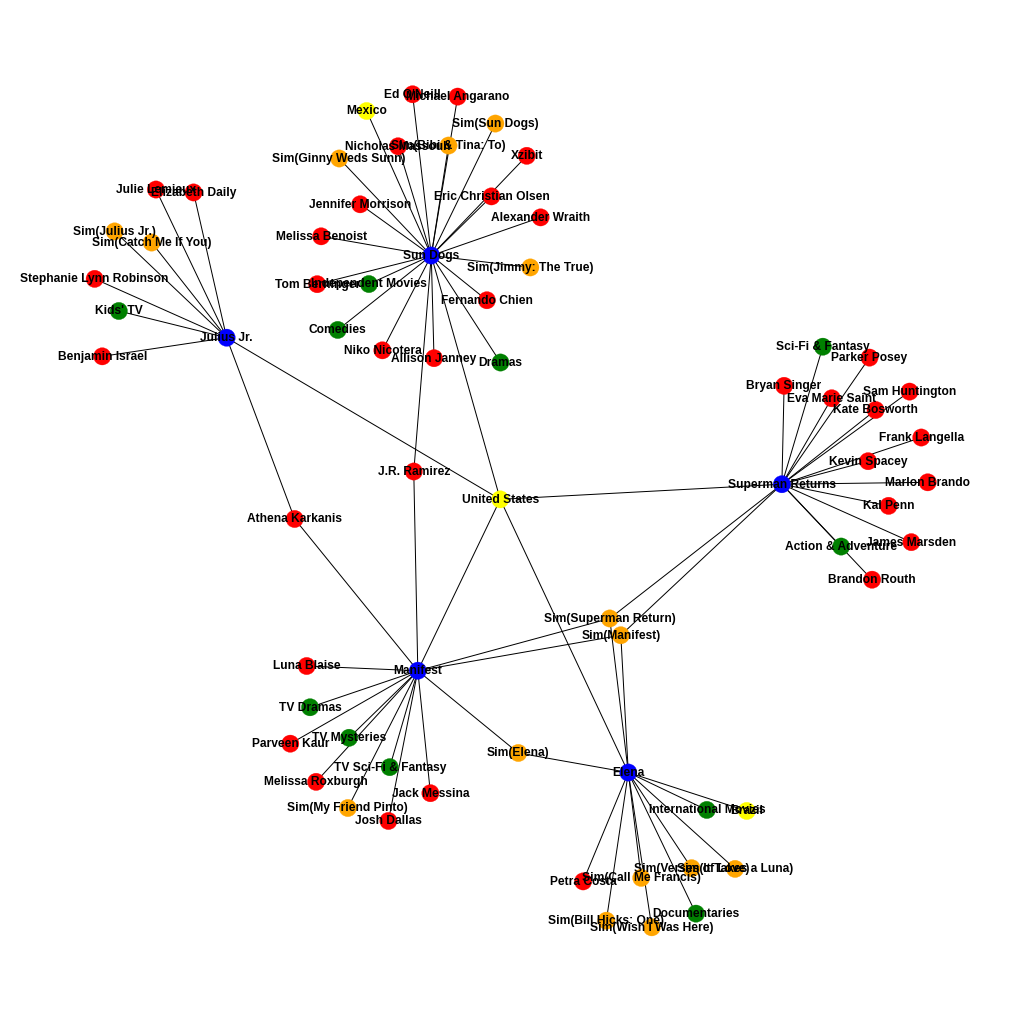

In [ ]:
reco=list(result9.index[:4].values)
reco.extend(["Manifest"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)